In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\AnalyticsVidhya\\Loan-Disbursed\\data_modified.csv", encoding="ISO-8859-1")
data.head()

,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Var5,Var4,Disbursed,loan_acquired,Age,Gender_1,Mobile_Verified_1,...,Var2_1,Var2_2,Var2_3,Var2_4,Var2_5,Var2_6,Source_1,Source_2,monthly_income_bins_1,monthly_income_bins_2
0,547.722558,5.0,0,0,1,0,0,39,0,0,...,0,0,0,0,0,1,0,0,0,1
1,447.213595,2.0,0,13,3,0,1,32,1,1,...,0,0,0,0,0,1,0,0,0,1
2,774.596669,4.0,0,0,1,0,0,36,1,1,...,1,0,0,0,0,0,0,1,0,1
3,1000.000000,5.0,0,10,3,0,0,30,1,1,...,1,0,0,0,0,0,0,1,0,1
4,707.106781,2.0,1,17,3,0,0,33,1,1,...,1,0,0,0,0,0,0,1,0,0


In [3]:
X = data.drop(['Disbursed'], axis=1)
y = data.Disbursed

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [7]:
models = []
models.append(('logistic',LogisticRegression()))
models.append(('tree',DecisionTreeClassifier()))
models.append(('forest',RandomForestClassifier()))
models.append(('boosting',GradientBoostingClassifier()))
models.append(('knn',KNeighborsClassifier()))
models.append(('svc',SVC()))
models.append(('naive_bayes',GaussianNB()))

accu = []
rmse = []
names = []

for name, model in models:
    xtrain,xtest,ytrain,ytest = train_test_split(X, y, random_state=0, test_size=0.3)
    model.fit(xtrain,ytrain)
    mod_pred = model.predict(xtest)
    accuracy_train = model.score(xtrain,ytrain)
    accuracy_test = accuracy_score(ytest,mod_pred)
    error_test = np.sqrt(mean_squared_error(ytest,mod_pred))
    accu.append(accuracy_test)
    rmse.append(error_test)
    names.append(name)
    print("%s : %f - %f - (%f)" %(name, accuracy_train, accuracy_test, error_test))

logistic : 0.985455 - 0.985176 - (0.121755)
tree : 0.997538 - 0.969815 - (0.173737)
forest : 0.994271 - 0.983337 - (0.129085)
boosting : 0.985537 - 0.985176 - (0.121755)
knn : 0.985570 - 0.984678 - (0.123783)
svc : 0.985455 - 0.985176 - (0.121755)
naive_bayes : 0.286650 - 0.284877 - (0.845649)


In [8]:
modelss = []
modelss.append(('logistic',LogisticRegression()))
modelss.append(('tree',DecisionTreeClassifier()))
modelss.append(('forest',RandomForestClassifier()))
modelss.append(('boosting',GradientBoostingClassifier()))
modelss.append(('knn',KNeighborsClassifier()))
modelss.append(('naive_bayes',GaussianNB()))

for name, model in modelss:
    cv_score = cross_val_score(model,X,y, cv=10, scoring='accuracy')
    print("%s : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (name,np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

    
#since svc is computationally very expensive, lets do it separately with 5 folds.
svc = SVC()
cv_sc = cross_val_score(svc,X,y, cv=5, scoring='accuracy')
print("svc : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_sc),np.std(cv_sc),np.min(cv_sc),np.max(cv_sc)))
        

logistic : Mean - 0.9853712 | Std - 5.156192e-05 | Min - 0.9852924 | Max - 0.9854057
tree : Mean - 0.9696393 | Std - 0.002861438 | Min - 0.963346 | Max - 0.9741409
forest : Mean - 0.9831648 | Std - 0.0006759609 | Min - 0.98219 | Max - 0.9841416
boosting : Mean - 0.9852563 | Std - 0.0001537206 | Min - 0.9849477 | Max - 0.9854057
knn : Mean - 0.9848081 | Std - 0.0004405103 | Min - 0.9836838 | Max - 0.985289
naive_bayes : Mean - 0.2850264 | Std - 0.02272765 | Min - 0.2462935 | Max - 0.3226844
svc : Mean - 0.9853712 | Std - 2.746453e-05 | Min - 0.9853482 | Max - 0.9854048


In [6]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs= -1, train_sizes=np.linspace(.1, 1, 10)):
    plt.figure()
    plt.title(title)
    plt.ylim([0.95,1.01])
    plt.xlabel("Training samples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from 'C:\\Users\\DHRUBAJIT\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

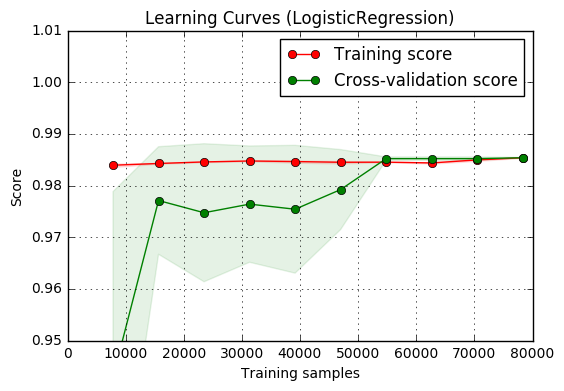

In [7]:
title = "Learning Curves (LogisticRegression)"
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, cv=10, n_jobs=4)

<module 'matplotlib.pyplot' from 'C:\\Users\\DHRUBAJIT\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

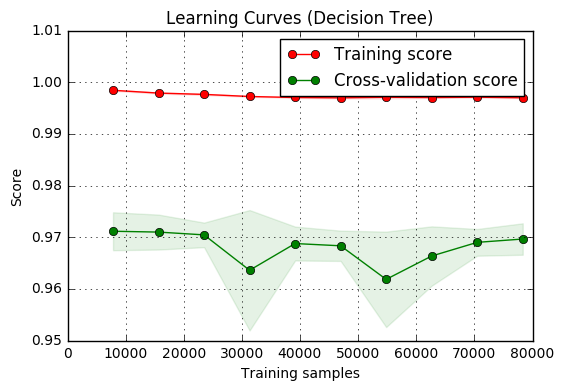

In [8]:
title = "Learning Curves (Decision Tree)"
estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, title, X, y, cv=10, n_jobs=4)

<module 'matplotlib.pyplot' from 'C:\\Users\\DHRUBAJIT\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

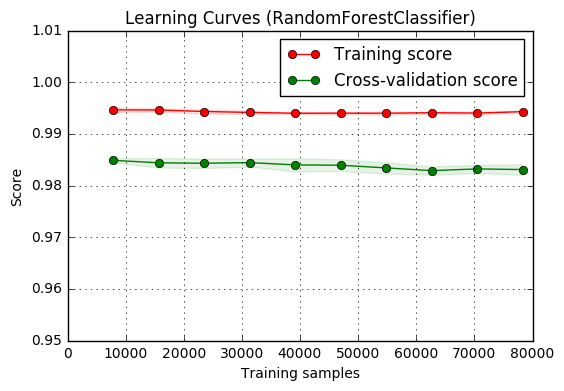

In [9]:
title = "Learning Curves (RandomForestClassifier)"
estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X, y, cv=10, n_jobs=4)

<module 'matplotlib.pyplot' from 'C:\\Users\\DHRUBAJIT\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

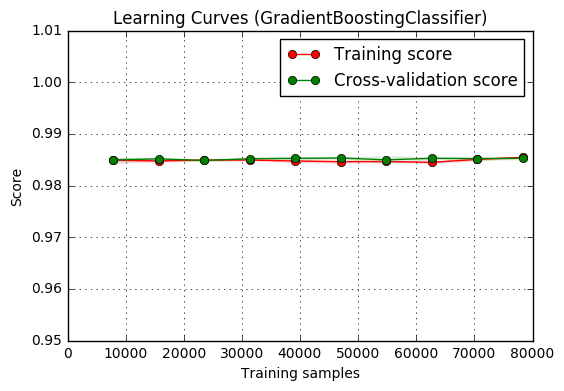

In [10]:
title = "Learning Curves (GradientBoostingClassifier)"
estimator = GradientBoostingClassifier()
plot_learning_curve(estimator, title, X, y, cv=10, n_jobs=4)

In [ ]:
'''
title = "Learning Curves (KNeighborsClassifier)"
estimator = KNeighborsClassifier()
plot_learning_curve(estimator, title, X, y, cv=10, n_jobs=4)
'''

In [ ]:
'''
title = "Learning Curves (SVC)"
estimator = SVC()
plot_learning_curve(estimator, title, X, y, cv=5, n_jobs=4)
plt.show()
'''